In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy.signal import find_peaks

In [70]:
# Datos

y = [0.000000000000001   , 0.8 , 1.6 , 3.2 , 4.8  , 6.5  , 8.1  , 9.7  , 11.3 , 12.9  , 14.5 , 16.1 , 17.7  , 19.3] # [mm]
I = [1.00, 0.95, 0.80, 0.39, 0.079, 0.003, 0.036, 0.043, 0.013, 0.0003, 0.012, 0.015, 0.0044, 0.0003]

# Constantes
λ = 0.0006328 # [mm]
L = 1000 # [mm]

In [73]:
def equation(B, I_sol):  # Función para resolver la ecuación
    return (np.sin(B) / B) - np.sqrt(I_sol)  # Ecuacion a resolver: Sin(β)^2/β^2 = 0 
 
β0 = np.pi / 2 # Estimación inicial
β = []  # Lista para almacenar las soluciones

for I_sol in I:   # Itera sobre cada valor de I (intensidad relativa) y resuelve la ecuación                             
    solution = fsolve(equation, β0, args=(I_sol))[0]  # Resuelve la ecuación y guarda la solución
    β.append(round(solution, 4))

print(f"β = {β}")

β = [0.0, 0.3913, 0.809, 1.6006, 2.4009, 2.9778, 2.6211, 2.5777, 2.8149, 3.0881, 2.8268, 2.7925, 2.945, 3.0881]


In [75]:
a_solutions = np.zeros(len(y))

for i in range(len(a_solutions)):
    if y[i] == 0:
        a_solutions[i] = 0
    else:
        a_solutions[i] = (a_solutions[i] * λ * np.sqrt(y[i]**2 + L**2)) / (np.pi * y[i])

a = np.mean(a_solutions)
print(f"El ancho de la rendija es de: {a} mm")

El ancho de la rendija es de: 0.0 mm


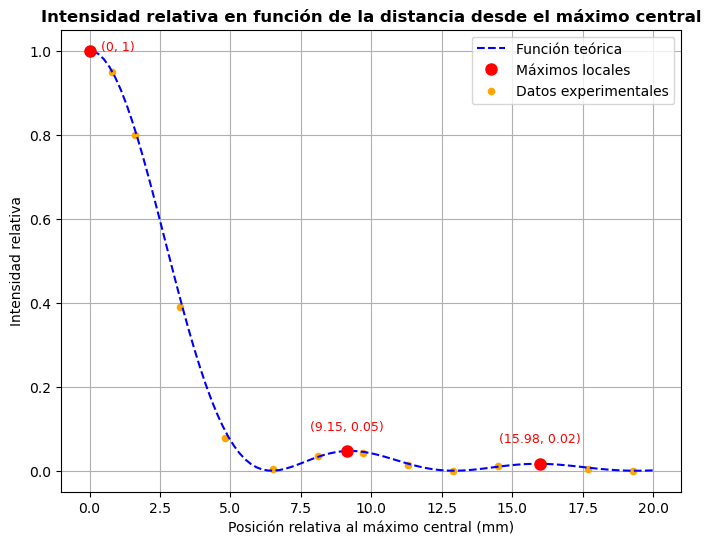

In [113]:
# Calcular la intensidad teórica
for i in range(100):
    if y_teo[i] == 0:
        I_teo[i] = 1
    else:
        I_teo[i] = (np.sin( (np.pi * y_teo[i] * 0.0979) / (λ * np.sqrt( y_teo[i]**2 + L**2 )) )**2 /
                    ((np.pi * y_teo[i] * 0.0979) / (λ * np.sqrt( y_teo[i]**2 + L**2 )))**2)

# Encontrar los máximos locales en I_teo
peaks, _ = find_peaks(I_teo)

# Gráfica de la intensidad teórica y los datos experimentales
plt.figure(figsize=(8, 6))

# Gráfica de la función teórica
plt.plot(y_teo, I_teo, label="Función teórica", color="blue", linestyle="--")

# Agregar los picos (máximos locales) a la gráfica
# Dibujar los máximos locales como puntos grandes rojos
plt.plot(y_teo[peaks], I_teo[peaks], "ro", markersize=8, label="Máximos locales")
plt.plot(0, 1, "ro", markersize=8)
plt.text(1, 1, f"(0, 1)", 
             fontsize=9, color='red', ha='center')

# Anotar los puntos de los máximos locales
for i, peak in enumerate(peaks):
    plt.text(y_teo[peak], I_teo[peak] + 0.05, f"({y_teo[peak]:.2f}, {I_teo[peak]:.2f})", 
             fontsize=9, color='red', ha='center')


# Gráfica de los datos experimentales
plt.scatter(y, I, color="orange", marker="o", s=20, label="Datos experimentales")

# Etiquetas y leyenda
plt.title("Intensidad relativa en función de la distancia desde el máximo central", fontweight='bold')
plt.xlabel("Posición relativa al máximo central (mm)")
plt.ylabel("Intensidad relativa")
plt.grid()
plt.legend()

# Mostrar la gráfica
plt.show()

In [616]:
I_observado = [1.00, 0.95, 0.80, 0.39, 0.079, 0.003, 0.036, 0.043, 0.013, 0.0003, 0.012, 0.015, 0.0044, 0.0003]
I_predicho = np.zeros(len(y))

for idx in range(len(y)):
    if y[idx] == 0:
        I_predicho[idx] = 1
    else:
        I_predicho[idx] = round((np.sin((np.pi * y[idx] * 0.1) / (λ * np.sqrt(y[idx]**2 + L**2)))**2 /
                                   ((np.pi * y[idx] * 0.1) / (λ * np.sqrt(y[idx]**2 + L**2)))**2),4)

   
 # Error Cuadratico Total

ECT = 0

for j in range(len(y)):
    ECT += (I_observado[j] - I_predicho[j])**2
    

print(f"Error Cuadratico Total: {ECT}" )
print(f"I_observado: {I_observado}" )    
print(f"I_predicho: {I_predicho}" )

Error Cuadratico Total: 0.00010795999999999895
I_observado: [1.0, 0.95, 0.8, 0.39, 0.079, 0.003, 0.036, 0.043, 0.013, 0.0003, 0.012, 0.015, 0.0044, 0.0003]
I_predicho: [1.000e+00 9.485e-01 8.066e-01 3.961e-01 8.330e-02 7.000e-04 3.670e-02
 4.270e-02 1.240e-02 4.000e-04 1.210e-02 1.540e-02 4.600e-03 3.000e-04]


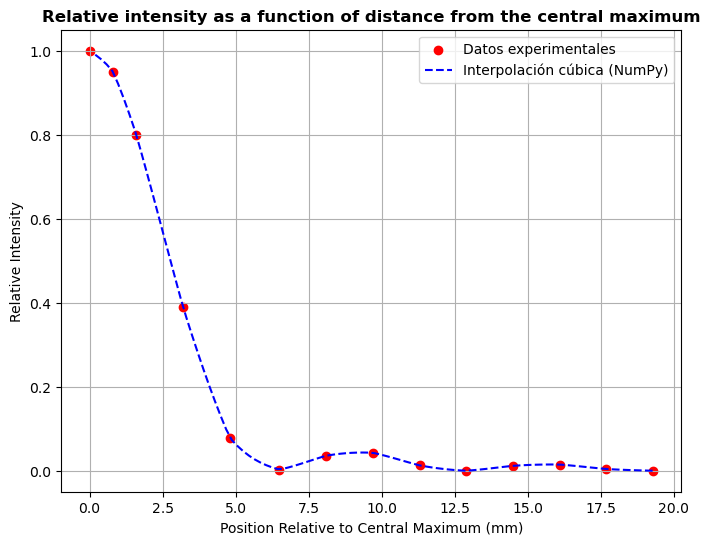

In [555]:
position = [0   , 0.8 , 1.6 , 3.2 , 4.8  , 6.5  , 8.1  , 9.7  , 11.3 , 12.9  , 14.5 , 16.1 , 17.7  , 19.3] # [mm]
intensity = [1.00, 0.95, 0.80, 0.39, 0.079, 0.003, 0.036, 0.043, 0.013, 0.0003, 0.012, 0.015, 0.0044, 0.0003]

# Número de intervalos
n = len(position) - 1

# Paso 1: Calcular las diferencias h y las derivadas finitas
h = np.diff(position)  # Distancia entre los puntos en x
b = (np.diff(intensity) / h)  # Derivada finita entre puntos

# Paso 2: Resolver el sistema lineal para los coeficientes de la segunda derivada (spline natural)
A = np.zeros((n+1, n+1))  # Matriz de coeficientes
B = np.zeros(n+1)         # Vector de constantes

# Condiciones naturales (segunda derivada cero en los extremos)
A[0, 0] = 1
A[n, n] = 1

# Construir el sistema de ecuaciones
for i in range(1, n):
    A[i, i-1] = h[i-1]
    A[i, i] = 2 * (h[i-1] + h[i])
    A[i, i+1] = h[i]
    B[i] = 3 * (b[i] - b[i-1])

# Resolver el sistema para obtener las segundas derivadas
M = np.linalg.solve(A, B)

# Paso 3: Interpolación en un rango más fino
def cubic_spline(x_eval, x, y, M, h):
    # Identificar el intervalo donde está el punto a evaluar
    i = np.searchsorted(x, x_eval) - 1
    if i >= len(h):
        i = len(h) - 1

    # Calcular las diferencias
    dx = x_eval - x[i]

    # Interpolación cúbica para el intervalo
    term1 = ((M[i+1] - M[i]) / (6 * h[i])) * (dx ** 3)
    term2 = M[i] * (dx ** 2) / 2
    term3 = ((y[i+1] - y[i]) / h[i] - (M[i+1] + 2 * M[i]) * h[i] / 6) * dx
    term4 = y[i]

    return term1 + term2 + term3 + term4

# Crear un conjunto de puntos más finos para evaluar la interpolación
x_new = np.linspace(min(position), max(position), 100)
y_new = np.array([cubic_spline(xi, position, intensity, M, h) for xi in x_new])

mask = (x_new >= 0) & (y_new >= 0)  # Create a mask for valid points
x_new_pos = x_new[mask]
y_new_pos = y_new[mask]

# Graficar los puntos originales y la curva interpolada
plt.figure(figsize=(8, 6))
plt.scatter(position, intensity, label="Datos experimentales", color="red")
plt.plot(x_new_pos, y_new_pos, label='Interpolación cúbica (NumPy)', color="Blue", linestyle = "--")
plt.legend(loc='best')
plt.xlabel("Position Relative to Central Maximum (mm)")
plt.ylabel("Relative Intensity")
plt.title("Relative intensity as a function of distance from the central maximum", fontweight='bold')
plt.grid(True)
plt.show()

In [598]:
# Definir múltiples puntos para evaluar
x_evaluar = [0.000000000001   , 0.8 , 1.6 , 3.2 , 4.8  , 6.5  , 8.1  , 9.7  , 11.3 , 12.9  , 14.5 , 16.1 , 17.7  , 19.3] # [mm]

# Evaluar la intensidad en cada punto
resultados = {x: cubic_spline(x, position, intensity, M, h) for x in x_evaluar}

for x, intensidad in resultados.items():
    print(f"La intensidad interpolada en x = {x} mm es: {intensidad}")

La intensidad interpolada en x = 1e-12 mm es: 0.999999999999952
La intensidad interpolada en x = 0.8 mm es: 0.95
La intensidad interpolada en x = 1.6 mm es: 0.8
La intensidad interpolada en x = 3.2 mm es: 0.39000000000000007
La intensidad interpolada en x = 4.8 mm es: 0.07899999999999996
La intensidad interpolada en x = 6.5 mm es: 0.002999999999999989
La intensidad interpolada en x = 8.1 mm es: 0.03599999999999999
La intensidad interpolada en x = 9.7 mm es: 0.043
La intensidad interpolada en x = 11.3 mm es: 0.013000000000000001
La intensidad interpolada en x = 12.9 mm es: 0.00029999999999999645
La intensidad interpolada en x = 14.5 mm es: 0.012000000000000002
La intensidad interpolada en x = 16.1 mm es: 0.015
La intensidad interpolada en x = 17.7 mm es: 0.004400000000000003
La intensidad interpolada en x = 19.3 mm es: 0.0003000000000000008


In [622]:
import numpy as np

# Valores de los anchos de la rendija
a = np.array([0.09735590273, 0.09811668991, 0.09838101215])

# Calcular la media
media = np.mean(a)

# Calcular la desviación estándar
desviacion_estandar = np.std(a, ddof=1)  # ddof=1 para la desviación estándar muestral

print(f"Media: {media:.10f} mm")
print(f"Desviación estándar: {desviacion_estandar:.10f} mm")


Media: 0.0979512016 mm
Desviación estándar: 0.0005322144 mm
